**Scientific Computation (MKP3303)**


>> R.U.Gobithaasan (2021). Scientific Computing, Lectures for Undergraduate Degree Program B.Sc (Applied Mathematics), Faculty of Ocean Engineering Technology & Informatics, University Malaysia Terengganu.
https://sites.google.com/site/gobithaasan/LearnTeach

<p align="center">
     © 2021 R.U. Gobithaasan All Rights Reserved.

</p>



**Chapter 5: Integration**   


**Symbolic Computing**
1. Symbolic computing: SymPy

**Analytical Solutions with SymPy**

2. Indefinite integral
3. Definite integral

**Numerical Solutions with SciPy**

4. Definite integral

5. Integration and its application


References: 
- [SymPy](https://www.sympy.org/en/index.html)
-  [SciPy Lecture Notes](http://scipy-lectures.org/)
- Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).


# Symbolic computing: SymPy

There are two approches to solving a mathematical problem: 

   1. **Analytic method**: we employ algebraic manipulation to reach to an exact solution. This method may involve hand computation with just pencil and paper to solve the problem. 
   2. **Numerical method**: we develop step-by-step algorithm to reach to an approximate solution, hence we may rely on a computer to do the computation.

- An example of analytic method is, we compute the root of a given quadratic equation by factoring them or use the well known solution.

- Whereas for numerical method, we may use Newton's method or Bisection method to compute the root of a quadratic equation.

- We usualy attempt to solve analytically, in case no exact solution exist, then we opt to numerical method. In scientific computing, the latter usualy the case.

- Computer algebra systems (CASs) are software which can carry out algebraic manipulation with a computer, similar to hand computation. Example of CAS is Wolfram Mathematica or its online version [wolframalpha](https://www.wolframalpha.com/)

- We will use SymPy; it is a symbolic computing module for Python. 

In [1]:
from IPython.display import IFrame
doc = IFrame(src = 'https://www.sympy.org/en/features.html', width=1155, height=400)
display(doc)

In [2]:
#!pip install sympy

In [5]:
import sympy
print(sympy.__version__)

sympy.init_printing() # to print out mathematical equations

1.10.1


### Web-based symbolic computing 

1. Try out web based [SymPy](https://www.sympygamma.com/)
2. Try out web based [Mathematica called Wolfram Alpha](https://www.wolframalpha.com/input/?i=) 

### Bare basics: symbols

In [6]:
c = 7 # python declaration
print(type(c))
c

<class 'int'>


- n takes the value of 7 with `sympy`

In [7]:
n = sympy.Integer(7)
print(type(n))
n

<class 'sympy.core.numbers.Integer'>


- using `sympify`

In [8]:
p = sympy.sympify(7.5)
print(type(p))
p

<class 'sympy.core.numbers.Float'>


- We are declaring $x$ as a symbol

In [9]:
x = sympy.Symbol("x")
print(type(x))
print(x.is_Symbol, ',', x.is_integer)

<class 'sympy.core.symbol.Symbol'>
True , None


- declaring integer type with sympy, its different compared to Python number type.


In [33]:
n = sympy.sympify(7)
print(n)
print(type(n))

n.is_Symbol,n.is_real, n.is_positive, n.is_even, n.is_odd

7
<class 'sympy.core.numbers.Integer'>


(False, True, True, False, True)

In [35]:
n = sympy.sympify(7)
n.is_integer, n.is_Integer

(True, True)

- is_integer: **for float numbers:** Built-in function which returns True if the float instance is finite with integral value, and False otherwise. Can also be used for declared symbols with sympy e.g. `(50.0).is_integer`

- is_Integer: **for declared symbols:** to check for symbols(sympy) given a value, so use this to check for sympy declaration/verification.

-  isinstance(): **for any instance:** Check if object is int or float

In [41]:
(50.0).is_integer() # to check any types of numbers

True

In [34]:
(50.0).is_Integer() # since 50.0 is float, this will give error

AttributeError: 'float' object has no attribute 'is_Integer'

In [45]:
i= 50.0
f= 50
print(isinstance(i, int))
print(isinstance(i, float))
print(isinstance(f, int))
print(isinstance(f, float))

False
True
True
False


- let's declare $m \in Z$ as a symbol

In [17]:
m = sympy.Symbol('m', integer = True)
print(m)
print(type(m))

m.is_integer, m.is_Integer, m.is_Symbol

m
<class 'sympy.core.symbol.Symbol'>


(True, False, True)

- let's declare $k =7.5 \in R$ as a symbol

In [18]:
k = sympy.Float(7.5)
print(k)
print(type(k))

k.is_real, k.is_Integer, k.is_Float, k.is_Symbol,

7.50000000000000
<class 'sympy.core.numbers.Float'>


(True, False, True, False)

- two more methods declaring symbols, also notice number type setting.

In [20]:
x2 = sympy.Symbol("x2",  imaginery=True)
x3,x4 = sympy.symbols("x3, x4", real=True)
x5 = sympy.var("x5",  positive=True)

In [21]:
x2.is_imaginary, x3.is_Float, x4.is_real, x4.is_complex, x5.is_positive

(None, False, True, True, True)

- declare $\cos{\left(\pi c_{i} \right)}$, with $c_{1}$ as a symbol and $c_{2} \in Z$ 

In [22]:
c1= sympy.Symbol("c1")
c2= sympy.Symbol("c2", integer=True)

In [23]:
sympy.cos(c1 * sympy.pi)

In [24]:
sympy.cos(c2 * sympy.pi) # a  simplified expression

- SymPy keeps it as a symbol until we explicitly evaluate it as a number using `sympy.N`

In [16]:
sympy.sqrt(3)

In [17]:
sympy.N(sympy.sqrt(3)) # Numerical approximation

- declaring rational numbers: $r_1 = \frac{1}{2}$ and  $r_2 = \frac{3}{4}$ 

In [18]:
r1 = sympy.Rational(1,2)
r2 = sympy.Rational(3,4)
print(r1+r2)
print(r1/r2)

5/4
2/3


- special symbols:
 1. `sympy.pi`: $\pi$
 2. `sympy.E`: natural logarithm
 3. `sympy.I`: imaginary unit ($\sqrt{-1}$)
 4. `sympy.oo`: $\infty$

In [19]:
sympy.factorial(10)

- Whereas Python's math function tend to represent $\sqrt{3}$ as a approximated number

In [20]:
import math as m
m.sqrt(3)

### Declaring a function

- standard python `def`:

In [21]:
def yp(m,x,c):
    return m*x +c

type(yp)

function

In [22]:
yp(2,3,1) # substitude to get its corresponding y value

There are three types of SymPy functions:
1. standard `sympy` mathematical functions
2. undefined functions: cannot be evaluated numerically, will be useful for defining differential equation. 
3. Lambda anonymous functions: specific body for function evaluation

- represent function for algebraic manipulation

In [25]:
f = sympy.Function('f')(x) # x as an argument
print(type(f))
f

f


In [30]:
sympy.diff(f,x) #differentiation for a function which is yet to defined

In [ ]:
m, x, c  = sympy.symbols('m,x,c')  # m,x,c as arguments
y = sympy.Function('y')(m,x,c)
print(type(y))
y

y


In [26]:
y.free_symbols

- built-in functions

In [ ]:
type(sympy.factorial)

sympy.core.function.FunctionClass

In [ ]:
sympy.factorial(x), sympy.factorial(5)

In [29]:
type(sympy.cos)

sympy.core.function.FunctionClass

In [30]:
sympy.cos(x), sympy.cos(sympy.pi)

- using **lambda** function

In [34]:
# standard python function
def g(x):
    return abs(x)

print(type(g))
g(-2)

<class 'function'>


In [35]:
g = sympy.Lambda(x, abs(x))
print(type(g))
g

<class 'sympy.core.function.Lambda'>


In [33]:
g(-12), g(10.3)

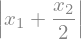

In [34]:
x1,x2 = sympy.symbols('x1,x2')
g(x1+x2/2)

### Expressions

-  represent mathematical formulation or a simple function as an **expression** in `sympy` for computation

In [36]:
m, x, c  = sympy.symbols('m,x,c')
y = m*x + c
type(y)

sympy.core.add.Add

In [36]:
y.args # list of all its arguments

In [37]:
y.args[1] # list the second argument

In [38]:
type(y.args[1])

sympy.core.mul.Mul

- substitution can be done easily by `subs` method:

In [39]:
y.subs(m,2)

In [40]:
y.subs(m,2).subs(c,1).subs(x,3)

- using a dictionary to substitude

In [41]:
values = {m:2, c:1, x:3}
y.subs(values)

### SymPy as the engine for Algebraic manipulation 

We can carry out the following manipulation with SymPy:
1. substitution (shown above)
2. expand, factor and collect
3. apart, together and cancel
4. simplification
5. many more!

#### 1. substitution

In [38]:
a,b,x = sympy.symbols('a,b,x')
f0 = ((a**2)+2*b + sympy.cos(x))
f0

In [39]:
f0.subs(a,2).subs(b,3)

In [40]:
val =  {a:2, b:3, x:sympy.pi}
f0.subs(val)

In [41]:
a,b,x = sympy.symbols('a,b,x')
((a**2)+2*b).subs(a,x).subs(b,3)

In [46]:
c = sympy.Symbol('c')
c = sympy.sqrt(a)
((a**2)+2*b).subs(b,c)

#### 2. expand, factor and collect

In [42]:
a,b,c, x = sympy.symbols('a,b,c,x')
f1 = (a*x**2 +c)*(-3*a*b*x + b**2)
f1

In [43]:
sympy.expand(f1)

In [46]:
print(_) # to print previous output, in case you need to reuse

-3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c


$- 3 a^{2} b x^{3} + a b^{2} x^{2} - 3 a b c x + b^{2} c$

In [45]:
print(_42) # to print output number 42

(a*x**2 + c)*(-3*a*b*x + b**2)


In [51]:
sympy.factor(-3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c)

In [52]:
f2 = -3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c;
f2.collect(x)

In [53]:
f2.collect(b)

#### 3. apart, together and cancel

In [50]:
f2 = 1/(-3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c);
f2

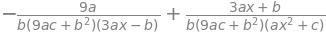

In [51]:
sympy.apart(f2,x)

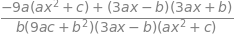

In [52]:
sympy.together(_)

In [53]:
sympy.cancel(_) # cancel shared factors

#### 4. simplification

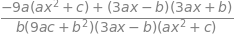

In [54]:
a,b,c, x = sympy.symbols('a,b,c,x')
f3 = (-9*a*(a*x**2 + c) + (3*a*x - b)*(3*a*x + b))/(b*(9*a*c + b**2)*(3*a*x - b)*(a*x**2 + c))
f3

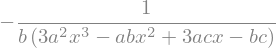

In [58]:
sympy.simplify(f3)

### Plotting using SymPy expression
- see [documentation](https://docs.sympy.org/latest/modules/plotting.html) 

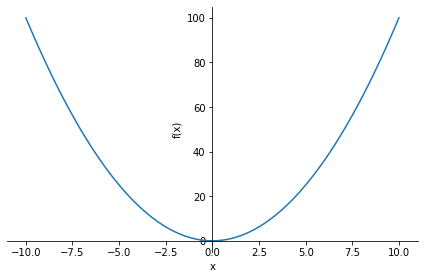

In [55]:
x = sympy.Symbol("x")
f = x*x
sympy.plot(f);

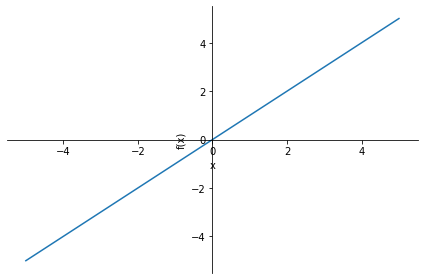

In [58]:
x = sympy.Symbol("x")
sympy.plot(x, (x, -5, 5));

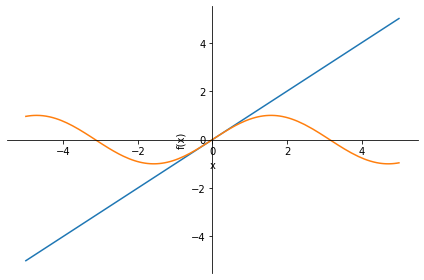

In [59]:
x = sympy.Symbol("x")
sympy.plot(x, sympy.sin(x), (x, -5, 5));

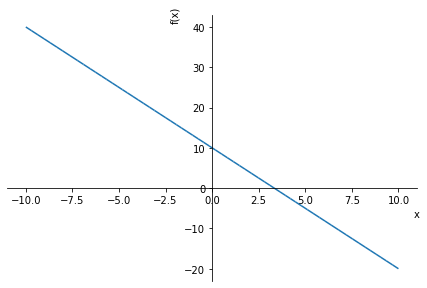

In [61]:
m, x, c  = sympy.symbols('m,x,c')
y = m*x +c
sympy.plot(y.subs({m:-3, c:10}));

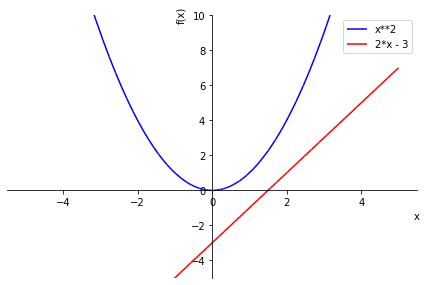

In [62]:
import sympy
from sympy.plotting import plot
f1 = x**2
f2 = 2*x -3
p = plot(f1, f2, (x, -5, 5), ylim=(-5, 10), legend=True, show=False);
p[0].line_color='b'
p[1].line_color='r'
p.show()

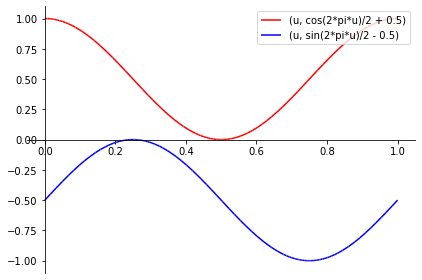

In [63]:
import sympy.plotting as splt
u = sympy.Symbol('u')
f1 = (u, sympy.cos(2*sympy.pi*u)/2 + 1/2)
f2 = (u, sympy.sin(2*sympy.pi*u)/2 - 1/2)
p = splt.plot_parametric(f1, f2, (u, 0, 1), line_color='blue',legend=True, show=False);
p[0].line_color = 'red'
p.show()

$f(x,y)= xy^2$

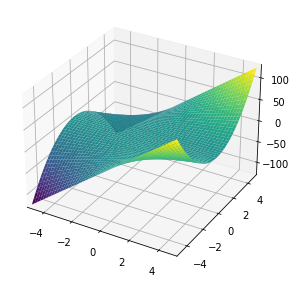

In [64]:
import sympy.plotting as splt
x, y = sympy.symbols('x,y')
splt.plot3d(x*y**2, (x, -5, 5), (y, -5, 5))

### Plotting with Matplotlib directly

- using `lambdify` to construct a function

In [80]:
from sympy.utilities.lambdify import lambdify
import numpy as np

f =  1 - sympy.cos(sympy.sin(0.3*x)) # function declared using sympy
fx = lambdify(x, f, modules = ['numpy']) # similar to function definition
print(type(fx))
fx

<class 'function'>


<function _lambdifygenerated(x)>

In [78]:
f.subs(x,sympy.pi) # original sympy function, gives exact value

In [77]:
print(sympy.N(_))

0.309789921927519


In [68]:
fx(np.pi) # converted sympy to numpy function

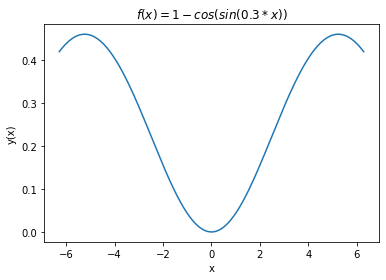

In [81]:
import matplotlib.pyplot as pl
xval = np.linspace(-2*np.pi,2*np.pi,200)

pl.plot(xval,fx(xval));
pl.xlabel('x');
pl.ylabel('y(x)');
pl.title('$f(x) = 1- cos(sin(0.3*x))$');

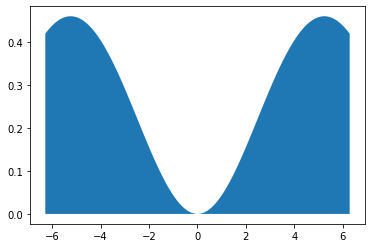

In [82]:
pl.fill_between(xval,fx(xval));

---
<div class="alert alert-block alert-info">
<b>Note:</b> The integrals module in SymPy implements methods to calculate definite and indefinite integrals.
</div>


# Integration: Symbolic Computing

## Indefinete integral

A primitive integral in the form of
$$\int f(x) dx $$
is also known as **indefinete integral** or antiderivative or inverse derivative. 

<class 'sympy.integrals.integrals.Integral'>


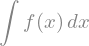

In [69]:
x,y = sympy.symbols('x,y')
f = sympy.Function('f')(x)
I1 = sympy.integrate(f,x)
print(type(I1))
I1

- we can integrate multivariate expressions 

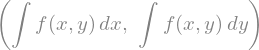

In [70]:
f = sympy.Function('f')(x,y)
I2 = sympy.integrate(f,x)
I3 = sympy.integrate(f,y)
I2, I3

- or carry out double integration

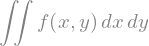

In [71]:
I4 = sympy.integrate(f,x,y)
I4

### Indefinete Integrals examples

- For example $$\int (x^{2} + x + 1) dx$$ where we declared the variable `x` as a symbol of `sympy`.
- we can directly plot the integration output using `sympy.plt`, by default `sympy` sets a suitable **limit**, making it a definite integral:

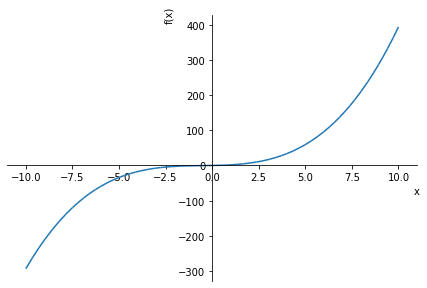

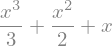

In [72]:
x = sympy.Symbol("x")
f = sympy.integrate(x**2 + x + 1, x)
sympy.plot(f);
f

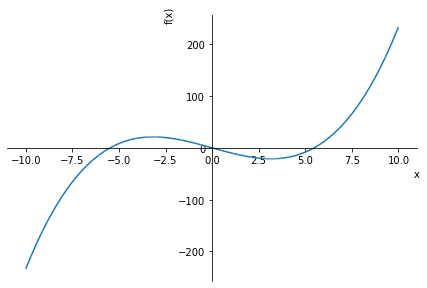

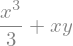

In [73]:
x = sympy.Symbol("x")
I5 = sympy.integrate(x**2 + y , x) # Integrate to x
sympy.plot(I5.subs(y,-10));
I5

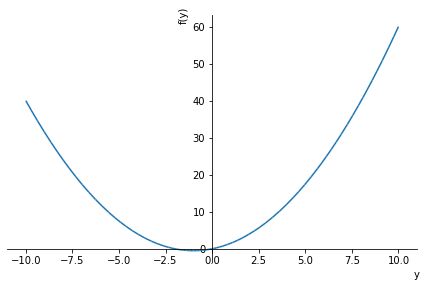

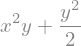

In [74]:
x = sympy.Symbol("x")
I6 = sympy.integrate(x**2 + y , y) # Integrate to x
sympy.plot(I6.subs(x,1));
I6

In [75]:
print(_)

x**2*y + y**2/2


- double integration

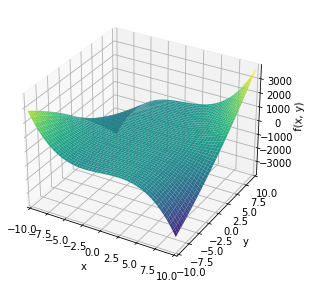

x**3*y/3 + x*y**2/2

In [8]:
import sympy
import sympy.plotting as splt
x,y = sympy.symbols('x, y')

I7 = sympy.integrate(x**2 + y , x, y)
splt.plot3d(I7)
I7

## Definite integral

### Linearity and the Basics

- we can set a suitable **limit** $x \in [a,b]$, making it a definite integral:


Let, $c, d \in R$, because summation is a linear operator, that is
$$
\sum_{i=0}^{n-1} (c f_i + d g_i) 
= c \sum_{i=0}^{n-1} f_i + d \sum_{i=0}^{n-1} g_i,
$$

definite integrals are linear,
$$
\int_a^b (c f(x) + d g(x))\,dx = c \int_a^b f(x)\,dx + d \int_a^b g(x) \,dx.
$$
One can also divide the **range of integration**.
$$
\int_a^b f(x) \, dx = \int_a^c f(x) \,dx + \int_c^b f(x) \,dx
$$
We assume that each of the above integrals exist.  If $a \leq b$, and 
we integrate from $b$ to $a$, then each of the $\Delta x_i$ will be negative.
From this observation, it is clear that
$$
\int_a^b f(x) \,dx = - \int_b^a f(x) \, dx.
$$
If we integrate any function from a point $a$ to that same point $a$, then
all the $\Delta x_i$ are zero and 
$$
\int_a^a f(x) \,dx = 0.
$$


### Mean Value Theorem of Integral Calculus.
Let $m = \min_{x \in [a,b]} f(x)$, $M = \max_{x \in [a,b]} f(x)$ and $f(x)$ be continuous. We can show that
$$
(b-a) m \leq \int_a^b f(x) \,dx \leq (b-a) M.
$$
Therefore there exists a constant $c \in [m,M]$ satisfying
$$
\int_a^b f(x) \,dx = (b-a) c.
$$
Since $f(x)$ is continuous, there is a point $\xi \in [a,b]$ such that
$f(\xi) = c$.  Thus we see that 
$$
\int_a^b f(x) \,dx = (b-a) f(\xi),
$$
for some $\xi \in [a,b]$.


### Definite Integrals with Variable Limits of Integration.
Consider $a$ to be a constant and $x$ variable, then the function $F(x)$
defined by
\begin{equation}
  \label{int_var_limit}
  F(x) = \int_a^x f(t) \,dt
\end{equation}

is an anti-derivative of $f(x)$, that is $F'(x) = f(x)$.  To show this
we apply the definition of differentiation and the integral mean value
theorem.
\begin{align*}
  F'(x)
  &= \lim_{\Delta x \to 0} \frac{F(x+\Delta x) - F(x)}{\Delta x} \\
  &= \lim_{\Delta x \to 0} \frac{ \int_a^{x+\Delta x} f(t) \,dt
    - \int_a^x f(t)\,dt }{\Delta x} \\
  &= \lim_{\Delta x \to 0} \frac{ \int_x^{x+\Delta x} f(t) \,dt }
  {\Delta x} \\
  &= \lim_{\Delta x \to 0} \frac{ f(\xi) \Delta x }
  {\Delta x}, \qquad \xi \in [x,x+\Delta x] \\
  &= f(x)
\end{align*}

**Example**
\begin{align*}
  \label{int_var_limit}
  \int_a^b sin(x) \,dt 
  & = \left [ cos(x) \right]_a^b  \\
  & = cos(b)-cos(a)
\end{align*}

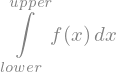

In [77]:
a,b,x,y = sympy.symbols('lower,upper,x,y')
f = sympy.Function('f')(x)
I8 = sympy.integrate(f,(x,a,b))
I8

- we can set the **limits** to $\infty$

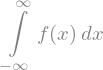

In [78]:
I9 = sympy.integrate(f,(x,-sympy.oo,sympy.oo))
I9

- single integration: manual substraction

- for example, $\int_0^{\pi/4} tan(x) dx$

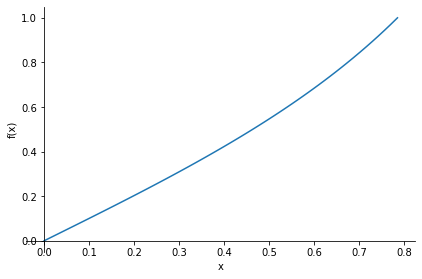

In [84]:
x = sympy.Symbol("x")
f = sympy.tan(x)
sympy.plot(f, (x, 0, sympy.pi/4));
f

In [85]:
I10 = sympy.integrate(sympy.tan(x),x)
I10

In [86]:
I10.subs(x,sympy.pi/4) - I10.subs(x,0) # upper limit - lower limit

- direct definite integration

In [87]:
sympy.integrate(f, (x,0, sympy.pi/4))

In [88]:
print(sympy.N(_))

0.346573590279973


In [89]:
sympy.N(sympy.integrate(f, (x,0, sympy.pi/4)))

In [90]:
sympy.integrate(f, (x,0, sympy.pi/2))

-  Manual substraction: double integral

**Example of double integral**
$$
\int_0^3 \int_0^5  f(x,y) \,dx dy
$$
where $f(x,y) = \frac{x^{3} y}{3} + \frac{x y^{2}}{2}$


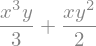

In [85]:
x= sympy.Symbol("x")
I7 = sympy.integrate(x**2 + y , x, y)
I7

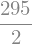

In [86]:
(I7.subs(x,5)- I7.subs(x,0)).subs(y,3)- (I7.subs(x,5)- I7.subs(x,0)).subs(y,0)

- direct integration

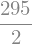

In [87]:
x, y = sympy.symbols("x,y")
volume = sympy.integrate(x**2 + y, (x,0,5),(y,0,3))
volume

---
# Integration: Numerical Approach

---
<div class="alert alert-block alert-info">
<b>Note:</b> SciPy implements numerical approaches for integrals.
</div>


In [88]:
from IPython.display import IFrame
doc = IFrame(src = 'https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html', width=1155, height=400)
display(doc)

### Numerical Approach: Definite integral using SymPy integrate module can be categorized into two types: 
1. routines that **take the integrand as a Python function**: This type uses Gaussian quadrature (quad, quadrature, fixed_quad), 
2. routines that **take arrays with samples of the integrand at given points**: this type use Newton-Cotes methods (trapz, simps, and romb).

**Example of using symbolic computing**
\begin{align*}
  \label{int_var_limit}
  \int_a^b x^3 \,dt 
  & = \left [ \frac{x^4}{4} \right]_a^b 
\end{align*}

In [89]:
x = sympy.Symbol('x')
fsym = sympy.integrate(x**3)
fsym

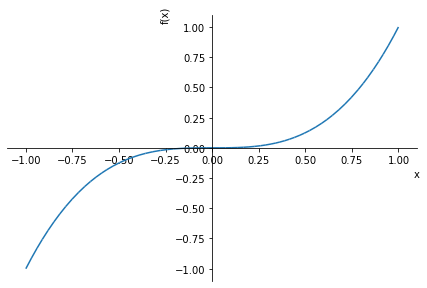

In [90]:
sympy.plot(x**3, (x, -1, 1));

In [91]:
fsym.subs(x,1) - fsym.subs(x,-1)

In [92]:
fsym.subs(x,0) - fsym.subs(x,-1)

In [93]:
fsym.subs(x,1) - fsym.subs(x,0)

**Numerical Approach: Definite integral using `SciPy`**

- The `quadrature` function is an adaptive Gaussian quadrature routine that is
implemented in Python.
- The `quad` function is a wrapper for routines from the FORTRAN library
QUADPACK, which has superior performance in terms of speed and has more features
(such as support for infinite integration limits)

###  Integrand as a Python function:

In [91]:
from scipy import integrate

def f(x):
    return (x**3)

val, err = integrate.quad(f, -1, 1)

In [95]:
val, err

- The quad routine supports infinite integration limits. 

**Example**
\begin{align*}
  \label{int_var_limit}
  \int^\infty_0 e^{-x} \,dx 
  & = \left[ - e^{- x} \right]_0^\infty 
\end{align*}

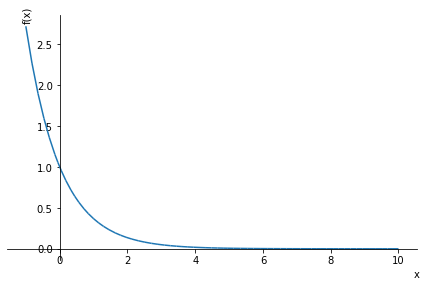

In [96]:
x = sympy.Symbol('x')
fsym = sympy.integrate(sympy.exp(-x))

sympy.plot(sympy.exp(-x), (x, -1, 10));
fsym

- analytical approach

In [97]:
fsym.subs(x,sympy.oo)-fsym.subs(x,0)

- numerical approach

In [98]:
f = lambda x: np.exp(-x)
val, err = integrate.quad(f, 0, np.inf)
print(val, err)

1.0000000000000002 5.842606742906004e-11


### infinite limits

- Gaussian quadrature method `quadratute` and `fixed_quad` in `SciPy`  is only available for **finite limits**. Command below will give you error.

In [99]:
#val, err = integrate.quadrature(f, 0, np.inf)
#print(val, err)

###  Integrand as an array of points:

In [92]:
f = lambda x: x**3 # Original function
a,b = 0, 1
x = np.linspace(a, b, 25) # inputs x
y = f(x) # inputs y

In [93]:
x

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

In [94]:
y

array([0.00000000e+00, 7.23379630e-05, 5.78703704e-04, 1.95312500e-03,
       4.62962963e-03, 9.04224537e-03, 1.56250000e-02, 2.48119213e-02,
       3.70370370e-02, 5.27343750e-02, 7.23379630e-02, 9.62818287e-02,
       1.25000000e-01, 1.58926505e-01, 1.98495370e-01, 2.44140625e-01,
       2.96296296e-01, 3.55396412e-01, 4.21875000e-01, 4.96166088e-01,
       5.78703704e-01, 6.69921875e-01, 7.70254630e-01, 8.80135995e-01,
       1.00000000e+00])

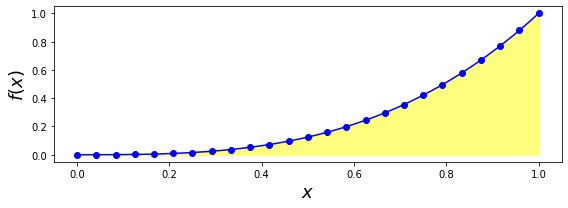

In [95]:
fig, ax = pl.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo') # input as an array of points
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='yellow', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)
fig.tight_layout()

- integration based on the function

In [102]:
t = sympy.Symbol('t')
fsym = sympy.integrate(t**3)
exact_area = fsym.subs(t,1)-fsym.subs(t,0)
exact_area

- integration based on an array of inputs using `trapz` and `simps`

In [103]:
Area_trapz = integrate.trapz(y, x)
Area_trapz

In [104]:
Area_simps = integrate.simps(y, x)
Area_simps

In [105]:
print('Trapz error', exact_area - Area_trapz)
print('Simps error', exact_area - Area_simps)

Trapz error -0.000434027777777790
Simps error 0


### Singularities

- **Improper integrals**: If the range of integration is infinite or $f(x)$ is discontinuous at some points then $\int_a^b f(x) \,dx$.
- Visualization may aid in finding those infinte points, for example below it occurs at $x=0$.

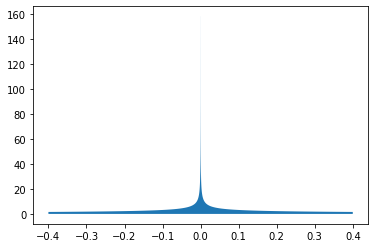

In [97]:
f = lambda x: 1/np.sqrt(abs(x))
a, b = -0.4, 0.4
xval = np.linspace(a, b, 10000)
pl.fill_between(xval,f(xval));

- you will get a warning if singularities are found

In [98]:
#integrate.quad(f,a,b)

/var/folders/d4/xlqnqm415bq4r2wp9dmf5w980000gn/T/ipykernel_5004/1466129232.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/np.sqrt(abs(x))


- use `points` to list the corresponding x values to avoid.

In [99]:
integrate.quad(f,a,b,points=[0])

### Multiple integration

- **using analytical approach:**
$$
\int_0^3 \int_0^5  f(x,y) \,dx dy
$$
where $f(x,y) = \frac{x^{3} y}{3} + \frac{x y^{2}}{2}$

In [104]:
x, y = sympy.symbols("x,y")
exact_volume = sympy.integrate(x**2 + y, (x,0,5),(y,0,3))
exact_volume

In [106]:
print(sympy.N(_))

147.500000000000


**Example of double integral**

- Double Integral: $\int_a^b \int_c^d f(x,y) \,dx dy$: use `dblquad`
- Triple Integral: $\int_a^b \int_c^d \int_e^f g(x,y,z) \,dx dy dz$: use `tplquad`


In [110]:
def f(x,y):
    return x**2 + y

approx_vol, err = integrate.dblquad(f,0,3,0,5) #f(a,b,c,d)
approx_vol, err

In [111]:
print('error: ',exact_volume - approx_vol)

error:  0


# Integrations and its applications

We can either employ numerical or an analytical approach for integration; it acts as a function to compute area and volume as shown in the previous sections.

### Compute the area of a function: $f(x)$ under the $x$ axis:
$$
 \int_{a}^b f(x) dx
$$


### Compute the area between two functions: $g(x)$ and $f(x)$ under the $x$ axis:
By the linearity property of integration,
we compute for area by finding the difference
$$
 \int_{a}^b f(x) dx -  \int_{a}^b g(x) dx,
$$
of two signed areas. 


**Example:**
Find the area enclosed by $f(x)=x+1$, $g(x)=9-x^2$, $x=-1$, $x=2$.

$$
\text{Area} = \int_{-1}^2 \Bigl[(9-x^2) - (x+1)\Bigr] dx
$$
We have reduced the problem to a computation:
$$
\int_{-1}^2 [(9-x^2) - (x+1)] dx
  = \int_{-1}^2 (8-x-x^2)dx
  = \left[ 8x - \frac{1}{2}x^2 - \frac{1}{3}x^3 \right]_{-1}^2
  = \frac{39}{2}.
$$


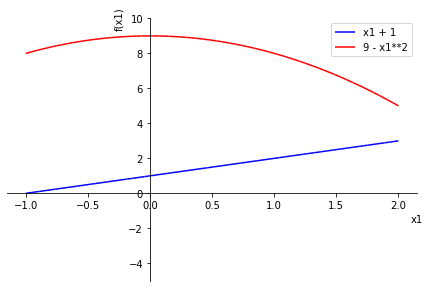

In [112]:
import sympy
from sympy.plotting import plot
f1 = x1 + 1
g1 = 9 - x1**2
p = plot(f1, g1, (x1, -1, 2), ylim=(-5, 10), legend=True, show=False);
p[0].line_color='b'
p[1].line_color='r'
p.show()

39/2


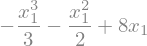

In [115]:
x = sympy.Symbol('x')
Area_g1f1= sympy.integrate(g1-f1)
print(Area_g1f1.subs(x1,2)-Area_g1f1.subs(x1,-1))
Area_g1f1

In [ ]:
f_definite = sympy.integrate(g1-f1, (x1,-1,2))
f_definite